# Exercises 

## Part 0: Regular expressions

* Now, explain in your own words: what are regular expressions?

A regular expression is .. 

* Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use findall to show that your regex works on this test-text. Hint: a great place to test out regular expressions is: https://regex101.com.

In [1]:
import re

# Match exactly 4 digits 
re_4_digits = r'\d{4}'

# Open file
f = open('test.txt', 'r')

# Match regex on file 
matches = re.findall(re_4_digits, f.read())

print matches

['1234', '9999', '2345']


* Provide an example of a regex to match words starting with "super". Show that it works on the test-text.

In [2]:
# Match any word starting with super (this means it should either be at the begining of the line or preceeded by a whitespace)
re_start_super = r'(?:^|\W)(super\w*)'

# Another interesting regex with words boundaries that yields the same result
#re_start_super_wb = r'\bsuper\w*\b'

f = open('test.txt', 'r')

# Match regex on file 
matches_super = re.findall(re_start_super, f.read())

print matches_super

['superpolaroid', 'supertaxidermy', 'superbeer']


* Regular expressions round 2. Show that you can extract the wiki-links from the test-text. Perhaps you can find inspiration on stack overflow or similar. Hint: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... take a look at the video lecture below.

In [3]:
re_wiki_link = r'\[\[(\w+)\|?.*?\]\]'

f = open('test.txt', 'r')

# Match regex on file 
wiki_links_matches = re.findall(re_wiki_link, f.read())

print wiki_links_matches

['drinking', 'gentrify', 'hashtag', 'Bicycle', 'Pitchfork']


In [4]:
wiki_root_url = 'https://en.wikipedia.org/wiki/'

wiki_links_extracted = [wiki_root_url + wiki_link_match for wiki_link_match in wiki_links_matches]

print wiki_links_extracted

['https://en.wikipedia.org/wiki/drinking', 'https://en.wikipedia.org/wiki/gentrify', 'https://en.wikipedia.org/wiki/hashtag', 'https://en.wikipedia.org/wiki/Bicycle', 'https://en.wikipedia.org/wiki/Pitchfork']


## Part A: Download Philosopher-pages from Wikipedia

* Find the names of all the philosopher-pages, download and analyze them.

In [8]:
# More advanced regex that captures links with whitespaces and doesn't require any manual pre-processing of the file
re_wiki_link = r'\*.*?\[\[([^\[\]|]+)[^\[\]]*\]\]' 

This regex works as follow :
* Match a leading *\**  at the begining of a line - this was identified to only contain the list of philosophers
* Match the text between *[[foo]]*, and in the case where we have *[[foo|bar]]*, only take the first part (foo)

In [9]:
import io

# Open the aestheticians file
f = io.open('philosophers_aestheticians.txt', 'r', encoding='utf-8')

# Find all matches
aestheticians_matches = re.findall(re_wiki_link, f.read())

aestheticians_count = len(aestheticians_matches)
# Check that we have the 126 astheticians (manually counted)
print aestheticians_count == 126

print aestheticians_matches

True
[u'Andreas Linder', u'Virgil Aldrich', u'Anandavardhana', u'Sri Aurobindo', u'John Anderson (philosopher)', u'Yves Marie Andr\xe9', u'Thomas Aquinas', u'Aristotle', u'Rudolf Arnheim', u'Mazen Asfour', u'Georg Anton Friedrich Ast', u'Augustine of Hippo', u'Jody Azzouni', u'Victor Basch', u'Yusuf Balasagun', u'Roland Barthes', u'Georges Bataille', u'Alexander Gottlieb Baumgarten', u'Monroe Beardsley', u'Vissarion Belinsky', u'Clive Bell', u'Walter Benjamin', u'Arnold Berleant', u'George Birkhoff', u'Max Black', u'Maurice Blanchot', u'Harold Bloom', u'Georg Brandes', u'Cameron Breen', u'Jean Anthelme Brillat-Savarin', u'Ferruccio Busoni', u'John Cage', u'Cesare Brandi', u'Stanley Cavell', u'R. G. Collingwood', u'Victor Cousin', u'Benedetto Croce', u'Gregory Currie', u'Arthur C. Danto', u'William C. Dowling', u'John Dewey', u'Umberto Eco', u'Jonathan Edwards (theologian)', u'Ralph Waldo Emerson', u'Jerry Farber', u'Valentin Feldman', u'Henri Focillon', u'Michel Foucault', u'Hans-Georg

In [10]:
# Open the epistemologists file
f = io.open('philosophers_epistemologists.txt', 'r', encoding='utf-8')

# Find all matches
epistemologists_matches = re.findall(re_wiki_link, f.read())

epistemologists_count = len(epistemologists_matches)
# Check that we have the 99 epistemologists (manually counted)
print epistemologists_count == 99

print epistemologists_matches

True
[u'William Alston', u'Thomas Aquinas', u'Aristotle', u'Robert Audi', u'A. J. Ayer', u'Francis Bacon', u'George Berkeley', u'Harry Binswanger', u'David Bohm', u'Laurence Bonjour', u'Berit Brogaard', u'Mario Bunge', u'Judith Butler', u'David Chalmers', u'Noam Chomsky', u'Jonathan Dancy', u'Simone de Beauvoir', u'Ren\xe9 Descartes', u'Fred Dretske', u'Nader El-Bizri', u'Margaret Elizabeth Egan', u'Catherine Elgin', u'Heinz von Foerster', u'Edmund Gettier', u'Ernst von Glasersfeld', u'Alvin Goldman', u'Emma Goldman', u'Nelson Goodman', u'John_Greco (philosopher)', u'Paul Grice', u'Susan Haack', u'Donna Haraway', u'Sandra Harding', u'Gilbert Harman', u'Sally Haslanger', u'Friedrich A. Hayek', u'G.W.F. Hegel', u'John Hawthorne', u'Thomas Hobbes', u'David Hume', u'James VI and I', u'Carrie Ichikawa Jenkins', u'Immanuel Kant', u'S\xf8ren Kierkegaard', u'Peter D. Klein', u'Hilary Kornblith', u'Jennifer Lackey', u'Keith Lehrer', u'Isaac Levi', u'David Lewis (philosopher)', u'Peter Lipton', 

In [11]:
# Open the ethicists file (we removed the last section 'See also' as it was hard to take into account in a single regex)
f = io.open('philosophers_ethicists.txt', 'r', encoding='utf-8')

# Find all matches
ethicists_matches = re.findall(re_wiki_link, f.read())

ethicists_count = len(ethicists_matches)
# Check that we have the 272 ethicists (manually counted)
print ethicists_count == 272

print ethicists_matches

True
[u'Pierre Ab\xe9lard', u'B. R. Ambedkar', u'John Stevens Cabot Abbott', u'Mortimer Adler', u'Nayef Al-Rodhan', u'Thomas Aquinas', u'Nomy Arpaly', u'Ambrose', u'Andronicus of Rhodes', u'Julia Annas', u'G. E. M. Anscombe', u'Karl-Otto Apel', u'Jacob M. Appel', u'Aristotle', u'Aristoxenus', u'John Arthur (philosopher)', u'Ashoka', u'Augustine of Hippo', u'Avicenna', u'Joxe Azurmendi', u"Bah\xe1'u'll\xe1h", u'Franz Xaver von Baader', u'Francis Bacon', u'Alain Badiou', u'Samuel Bailey', u'Tom Beauchamp', u'Friedrich Eduard Beneke', u'Jeremy Bentham', u'Thomas Berry', u'Maurice Blanchot', u'Dietrich Bonhoeffer', u'Murray Bookchin', u'George Boole', u'Nick Bostrom', u'Daniel Brock', u'Martin Buber', u'Gautama Buddha', u'Mario Bunge', u'Judith Butler', u'Albert Camus', u'Arthur Caplan', u'Roger Chao', u'James Childress', u'Randy Cohen', u'Confucius', u'John M. Cooper', u'Alice Crary', u'Roger Crisp', u'Simon Critchley', u'David Crocker', u'Mary Daly', u'Norman Daniels', u'Partha Dasgupta'

In [12]:
# Open the logicians file
f = io.open('philosophers_logicians.txt', 'r', encoding='utf-8')

# Find all matches
logicians_matches = re.findall(re_wiki_link, f.read())

logicians_count = len(logicians_matches)
# Check that we have the 274 logicians (manually counted)
print logicians_count == 274

print logicians_matches

True
[u'Pierre Abelard', u'Wilhelm Ackermann', u'Sergei Adian', u'Rodolphus Agricola', u'Kazimierz Ajdukiewicz', u'Alcuin', u'Alan Ross Anderson', u'Peter B. Andrews (mathematician)', u'Thomas Aquinas', u'Lennart \xc5qvist', u'Aristotle', u'Ahmed Raza Khan', u'Heiric of Auxerre', u'Bahmanyar', u'Alexander Bain', u'Yehoshua Bar-Hillel', u'Ruth Barcan Marcus', u'Henk Barendregt', u'Jon Barwise', u'James Earl Baumgartner', u'John Lane Bell', u'Nuel Belnap', u'Paul Benacerraf', u'Johan van Benthem (logician)', u'Paul Bernays', u'Evert Willem Beth', u'Jean-Yves B\xe9ziau', u'J\xf3zef Maria Boche\u0144ski', u'Boethius', u'Bernard Bolzano', u'Andrea Bonom\xec', u'George Boole', u'George Boolos', u'Nicolas Bourbaki', u'Thomas Bradwardine', u'Richard Brinkley', u'Luitzen Egbertus Jan Brouwer', u'Alan Bundy', u'Franco Burgersdijk', u'Walter Burley', u'Jean Buridan', u'Georg Cantor', u'Rudolf Carnap', u'Lewis Carroll', u'Categoriae decem', u'Gregory Chaitin', u'Chrysippus', u'Alonzo Church', u'Le

In [13]:
# Open the metaphysicians file
f = io.open('philosophers_metaphysicians.txt', 'r', encoding='utf-8')

# Find all matches
metaphysicians_matches = re.findall(re_wiki_link, f.read())

metaphysicians_count = len(metaphysicians_matches)
# Check that we have the 96 metaphysicians (manually counted)
print metaphysicians_count == 96

print metaphysicians_matches

True
[u'Pythagoras', u'Democritus', u'Heraclitus', u'Anaximander', u'Plotinus', u'Lucretius', u'Proclus Lycaeus', u'Zeno of Elea', u'Parmenides', u'Protagoras', u'Plato', u'Aristotle', u'Thomas Aquinas', u'Duns Scotus', u'Galileo Galilei', u'Ren\xe9 Descartes', u'Anne Conway, Viscountess Conway', u'Baruch Spinoza', u'Nicolas Malebranche', u'J. M. E. McTaggart', u'Gottfried Leibniz', u'George Berkeley', u'Immanuel Kant', u'Georg W. F. Hegel', u'Arthur Schopenhauer', u'Austin Osman Spare', u'Nicolai Hartmann', u'Martin Heidegger', u'Gottlob Frege', u'G. E. Moore', u'Pierre Teilhard de Chardin', u'Bertrand Russell', u'Alfred North Whitehead', u'Henri Bergson', u'Ludwig Wittgenstein', u'George Holmes Howison', u'Marilyn McCord Adams', u'Robert Merrihew Adams', u'William Alston', u'David Malet Armstrong', u'Alain Badiou', u'Lynne Rudder Baker', u'Paul Benacerraf', u'C. D. Broad', u'Berit Brogaard', u'David Chalmers', u'Gilles Deleuze', u'Arda Denkel', u'Michael Devitt', u'Nader El-Bizri', u

In [14]:
# Open the sociopoliticians file (we removed the last section 'See also' as it was hard to take into account in a single regex)
f = io.open('philosophers_sociopolitical.txt', 'r', encoding='utf-8')

# Find all matches
sociopoliticians_matches = re.findall(re_wiki_link, f.read())

sociopoliticians_count = len(sociopoliticians_matches)
# Check that we have the 295 sociopoliticians (manually counted)
print sociopoliticians_count == 295

print sociopoliticians_matches

True
[u'Abraham Joshua Heschel', u'Abul Kalam Azad', u'Adam M\xfcller', u'Adrian Johnston (philosopher)', u'Alan Carter (philosopher)', u'Alan Ryan', u'Alastair Norcross', u'Alexis de Tocqueville', u'Alfred Rosenberg', u'Ali Shariati', u'Alon Ben-Meir', u'Andrei Marga', u'Anthony de Jasay', u'Ant\xf3nio Castanheira Neves', u'Antonio Negri', u'Archon', u'Aristotle', u'Armin Mohler', u'Arthur Linton Corbin', u'Arthur Moeller van den Bruck', u'Auberon Herbert', u'Averroes', u'Axel Honneth', u'Ayn Rand', u'Benjamin Tucker', u'Bertrand de Jouvenel', u'Bertrand Russell', u'Bhimrao Ramji Ambedkar', u'Boris Furlan', u'Bruce Lee', u'Bruno Leoni', u'Bryan Caplan', u'Carl Joachim Friedrich', u'Carl Schmitt', u'Carlo Lottieri', u'Chankya', u'Charles Blattberg', u'Charles de Secondat, baron de Montesquieu', u'Charles Taylor (philosopher)', u'Cheng Hao', u'Cheng Yi (philosopher)', u'Claude Lefort', u'Claude L\xe9vi-Strauss', u'Claudio Canaparo', u'Confucius', u'Constantin R\u0103dulescu-Motru', u'Co

In [15]:
from itertools import chain

# Combined list of all philosophers (with duplicates)
philosophers = list(chain(aestheticians_matches, epistemologists_matches, ethicists_matches, logicians_matches, 
                          metaphysicians_matches, sociopoliticians_matches))
# Set with all the philosophers (without duplicates)
philosophers_unique = set(philosophers)

philosophers_count = len(philosophers)
philosophers_count_unique = len(philosophers_unique)

print philosophers_count
print philosophers_count_unique

1162
1013


* Let's put together some descriptive statistics:
    * How many philosophers in each list? How many total?


In [13]:
print "There are %d aesthicians" % aestheticians_count
print "There are %d epistemologists" % epistemologists_count
print "There are %d ethicists" % ethicists_count
print "There are %d logicians" % logicians_count
print "There are %d metaphysicians" % metaphysicians_count
print "There are %d sociopoliticians \n" % sociopoliticians_count
print "There are %d philosophers in total" % philosophers_count_unique

There are 126 aesthicians
There are 99 epistemologists
There are 272 ethicists
There are 274 logicians
There are 96 metaphysicians
There are 295 sociopoliticians 

There are 1013 philosophers in total


* 
    * Which is the largest branch of philosophy?

In [14]:
# Based on the last result, we can see the largest branch is the social and political branch, but let's code it

philosophers_branch_count_dict = {
    'aesthicians': aestheticians_count,
    'epistemologists': epistemologists_count,
    'ethicists': ethicists_count,
    'logicians': logicians_count,
    'metaphysicians': metaphysicians_count, 
    'social and political': sociopoliticians_count
}

largest_branch_name = 'aesthicians'
largest_branch_count = aestheticians_count

for branch_name, branch_count in philosophers_branch_count_dict.iteritems():
    if branch_count >= largest_branch_count:
        largest_branch_name = branch_name
        largest_branch_count = branch_count
        
print "The largest branch of philosophy is the %s branch with %d philosophers." % (largest_branch_name, largest_branch_count)

The largest branch of philosophy is the social and political branch with 295 philosophers.


* 
    * Are some philosophers in more than one list?

In [15]:
seen = set()
# adds all elements it doesn't know yet to seen and all other to seen_twice
seen_twice = set( x for x in philosophers if x in seen or seen.add(x) )

print seen_twice
print len(seen_twice)

set([u'Christian Wolff (philosopher)', u'Martin Heidegger', u'Thomas Hill Green', u'Jeremy Bentham', u'Martha Nussbaum', u'Joxe Azurmendi', u'John Hospers', u'Walter Terence Stace', u'Jessica Wilson', u'Baruch Spinoza', u'Friedrich Schiller', u'Niccol\xf2 Machiavelli', u'Plato', u'Peter Geach', u'Georges Bataille', u'Emma Goldman', u'Socrates', u'Maurice Blanchot', u'S\xf8ren Kierkegaard', u'David Kolb', u'Mencius', u'T. M. Scanlon', u'Jean-Jacques Rousseau', u'Friedrich Nietzsche', u'John Locke', u'Aristotle', u'George Berkeley', u'Abraham Joshua Heschel', u'Jean-Fran\xe7ois Lyotard', u'Ruth Barcan Marcus', u'Michel Onfray', u'Alfred North Whitehead', u'Mozi', u'Judith Butler', u'Max Stirner', u'Robert S. Hartman', u'Giambattista Vico', u'Berit Brogaard', u'Saul Kripke', u'Karl Popper', u'Hugo Grotius', u'Peter of Spain (author)', u'Lorenzo Pe\xf1a', u'David Chalmers', u'Walter Benjamin', u'Michael Oakeshott', u'Graham Priest', u'Mao Zedong', u'Thomas Nagel', u'G. E. Moore', u'P. F. S

* 
    * Which philosopher is in most lists & and how many?

In [19]:
def if_philosopher_in_branch(philosopher_branches, philosopher, branch):
    if philosopher in branch:
        philosopher_branches[philosopher] += 1

philosopher_branches = {}
for philosopher in philosophers_unique:
    philosopher_branches[philosopher] = 0
    
    if_philosopher_in_branch(philosopher_branches, philosopher, aestheticians_matches)
    if_philosopher_in_branch(philosopher_branches, philosopher, epistemologists_matches)
    if_philosopher_in_branch(philosopher_branches, philosopher, ethicists_matches)
    if_philosopher_in_branch(philosopher_branches, philosopher, logicians_matches)
    if_philosopher_in_branch(philosopher_branches, philosopher, metaphysicians_matches)
    if_philosopher_in_branch(philosopher_branches, philosopher, sociopoliticians_matches)

philosopher_most_list = ""
philosopher_most_list_count = 0
for philosopher, count in philosopher_branches.iteritems():
    if count >= philosopher_most_list_count:
        philosopher_most_list = philosopher
        philosopher_most_list_count = count

print "The philosopher that is in most branches is %s (present in %d branches)" % (philosopher_most_list, philosopher_most_list_count)

The philosopher that is in most branches is Aristotle (present in 6 branches)


* 
    * Let's investigate philosophers active in multiple sub-fields. Create a list of every philosopher that occurs in more than one list. Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).

In [17]:
philosophers_in_multiple_branches = []
for philosopher, count in philosopher_branches.iteritems():
    if count > 1:
        philosophers_in_multiple_branches.append((philosopher, count))

philosophers_in_multiple_branches.sort(key=lambda (philosopher, count): -count)

In [20]:
for (philosopher, count) in philosophers_in_multiple_branches:
    print "%s -> %d" % (philosopher, count)

Thomas Aquinas -> 6
Aristotle -> 6
Plato -> 5
Bertrand Russell -> 5
Immanuel Kant -> 5
Ayn Rand -> 4
Gottfried Leibniz -> 3
Georg Wilhelm Friedrich Hegel -> 3
Nelson Goodman -> 3
Søren Kierkegaard -> 3
Ludwig Wittgenstein -> 3
John Stuart Mill -> 3
John Locke -> 3
Judith Butler -> 3
David Hume -> 3
Arthur Schopenhauer -> 3
Mario Bunge -> 3
Susan Haack -> 3
Christian Wolff (philosopher) -> 2
Martin Heidegger -> 2
Baruch Spinoza -> 2
Socrates -> 2
Joxe Azurmendi -> 2
George Berkeley -> 2
Mozi -> 2
Giambattista Vico -> 2
Berit Brogaard -> 2
David Chalmers -> 2
Walter Benjamin -> 2
Graham Priest -> 2
Thomas Nagel -> 2
Sally Haslanger -> 2
Herbert Spencer -> 2
Georges Bataille -> 2
Michael Oakeshott -> 2
René Descartes -> 2
Gottlob Frege -> 2
Karl-Otto Apel -> 2
Mortimer Adler -> 2
Catherine Elgin -> 2
Emma Goldman -> 2
Peter Kropotkin -> 2
Joseph Raz -> 2
Kit Fine -> 2
John Hospers -> 2
Philip Pettit -> 2
Jessica Wilson -> 2
Francis Hutcheson (philosopher) -> 2
William of Ockham -> 2
Murra

* Download wikipages and save them to your own computer. For each of the philosophers in the combined list obtained in the previous exercise, use Wikipedia's API to download the full page content (using python) and save it (get it in json format, AND don't get the html version of the page which is much more difficult to parse). 

In [17]:
import requests, io
import cPickle as pickle

wikipedia_root_api_url = "http://en.wikipedia.org/w/api.php"
philosophers_dir = 'philosophers'

def download_wikipage(philosopher):
    payload = {
        'action': 'query',
        'format': 'json',
        'prop': 'revisions',
        'rvprop': 'content',
        'titles': philosopher
    }
    
    response = requests.get(wikipedia_root_api_url, params=payload)
    content = response.json()
    
    # If there are no pages associated to the philosopher, just skip it 
    if 'pages' not in content['query']:
        return None
        
    philosopher_pages = content['query']['pages']
    philosopher_content = philosopher_pages[philosopher_pages.keys()[0]]
    
    # If there's no content in the page, skip it as well 
    if 'revisions' not in philosopher_content:
        return None
    
    return content

def save_to_file(file_name, json):
    with io.open('./' + philosophers_dir + '/' + file_name + '.pickle', 'wb') as f:
        pickle.dump(json, f)


In [18]:
for philosopher in philosophers_unique:
    philosopher_wikipage = download_wikipage(philosopher)
    if philosopher_wikipage:
        save_to_file(philosopher, philosopher_wikipage)

## Part B: Building the networks

* Build the philosopher network. The combined list from above provides the network nodes. We will use info from the pages to define links. Every time philosopher A's page links to philosopher B's page, we create a directed link from A to B. There are many ways to do this, but below, I've tried to break it down into natural steps.

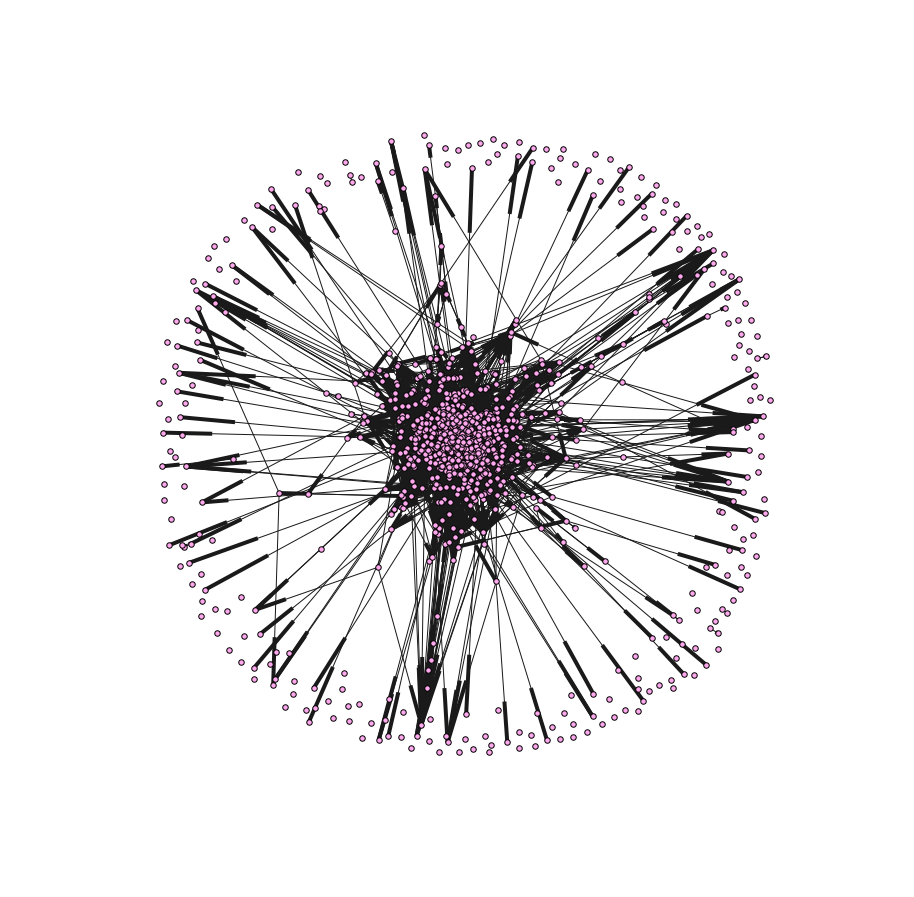

In [87]:
from os import listdir
from os.path import isfile, join
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

def load_philosopher_from_file(file_name):
    with open(file_name, 'rb') as f:
        philosopher_json = pickle.load(f)
        return philosopher_json

def get_list_of_philosophers_files(directory):
    files = [join(directory, f) for f in listdir(directory) if isfile(join(directory, f))]
    return files

# Redefine the regex - we don't need to take into account this time the leading * as we did earlier on 
re_wiki_link = r'\[\[([^\[\]|]+)[^\[\]]*\]\]'

# Create a standard graph
phi_network = nx.DiGraph()

# Get all the files with the philosophers information
philosopher_files = get_list_of_philosophers_files(philosophers_dir)

for philosopher_file in philosopher_files:
    philosopher_wikipage = load_philosopher_from_file(philosopher_file)
    
    philosopher_pages = philosopher_wikipage['query']['pages']
    philosopher_content = philosopher_pages[philosopher_pages.keys()[0]]
    
    # Add node in the network
    philosopher_name = philosopher_content['title']
    phi_network.add_node(philosopher_name)
    
    # Retrieve the content in the page
    content_in_page = philosopher_content['revisions'][0]['*']
    
    # Find all links in the page
    links_in_page = re.findall(re_wiki_link, content_in_page)
    
    # Find all links in the page that refer to philosophers in our list using set's intersection
    connections = list(philosophers_unique.intersection(set(links_in_page)))
   
    # Add the edges to the network 
    connections_to_add = [(philosopher_name, connection) for connection in connections]
    phi_network.add_edges_from(connections_to_add)

# Plot the network     
pos = nx.spring_layout(phi_network)
plt.figure(1,figsize=(12,12))
nx.draw(phi_network, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1, pos=pos)
plt.show()

## Part C: Analyzing the networks

* Why do you think we want to use a directed graph? Could have we used an undirected graph instead?

We wanted to use a directed graph because ..

* What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?

In [91]:
import numpy as np

print "Number of nodes in the philosopher network : %d" % len(phi_network.nodes())

print "Number of links in the philosopher network : %d" % len(phi_network.edges())

degrees = nx.degree(phi_network).values()

average_degree = np.average(degrees)

print "Average degree of the philosopher network : %f" % average_degree

median_degree = np.median(degrees)

print "Median degree of the philosopher network : %f" % median_degree

Number of nodes in the philosopher network : 1012
Number of links in the philosopher network : 4386
Average degree of the philosopher network : 8.667984
Median degree of the philosopher network : 4.000000


* List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?

In [106]:
phi_network_nodes = phi_network.nodes()

philosophers_in_degree_tuples = sorted([(node, phi_network.in_degree(node)) for node in phi_network_nodes], key=lambda (n, d): -d)
philosophers_out_degree_tuples = sorted([(node, phi_network.out_degree(node)) for node in phi_network_nodes], key=lambda (n, d): -d)

print philosophers_in_degree_tuples[:10]
print philosophers_out_degree_tuples[:10]

[(u'Immanuel Kant', 127), (u'Aristotle', 119), (u'Plato', 87), (u'Bertrand Russell', 85), (u'Karl Marx', 80), (u'Friedrich Nietzsche', 64), (u'David Hume', 63), (u'Ludwig Wittgenstein', 61), (u'John Stuart Mill', 57), (u'Georg Wilhelm Friedrich Hegel', 55)]
[(u'Georg Wilhelm Friedrich Hegel', 50), (u'Friedrich Nietzsche', 44), (u'Immanuel Kant', 42), (u'Martin Heidegger', 40), (u'Bertrand Russell', 40), (u'David Hume', 38), (u'S\xf8ren Kierkegaard', 33), (u'John Stuart Mill', 32), (u'Plato', 31), (u'Michel Foucault', 31)]


* Plot the distribution of in-degrees and out-degrees, binned using numpy.histogram. What is the most common degree?

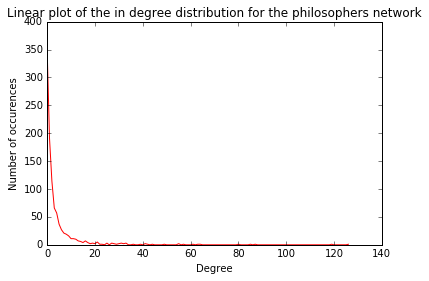

In [123]:
# Compute min and max values for the degrees
philosophers_in_degree = map(lambda x: x[1], philosophers_in_degree_tuples)
philosophers_out_degree = map(lambda x: x[1], philosophers_out_degree_tuples)
max_in_degree = max(philosophers_in_degree)
min_in_degree = min(philosophers_in_degree)
max_out_degree = max(philosophers_out_degree)
min_out_degree = min(philosophers_out_degree)

# Compute the bins for our degree distribution
bins_in = [i for i in range(min_in_degree, max_in_degree+1)]
bins_out = [i for i in range(min_out_degree, max_out_degree+1)]

degrees_in_hist, degrees_in_bin = np.histogram(philosophers_in_degree, bins=bins_in)
degrees_out_hist, degrees_out_bin = np.histogram(philosophers_out_degree, bins=bins_out)

plt.plot(degrees_in_bin[:-1], degrees_in_hist, 'r')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Linear plot of the in degree distribution for the philosophers network')
plt.show()

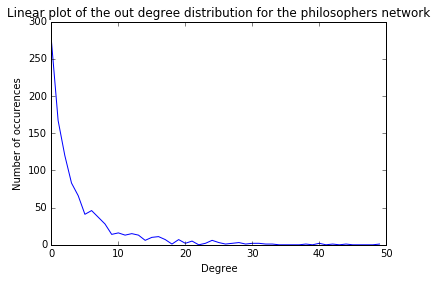

In [121]:
plt.plot(degrees_out_bin[:-1], degrees_out_hist)
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Linear plot of the out degree distribution for the philosophers network')
plt.show()

* Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.

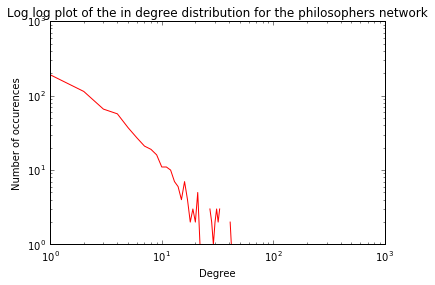

In [124]:
plt.loglog(degrees_in_bin[:-1], degrees_in_hist, 'r')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Log log plot of the in degree distribution for the philosophers network')
plt.show()

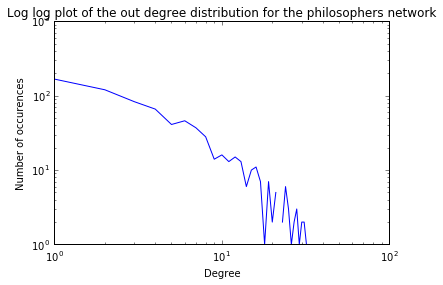

In [118]:
plt.loglog(degrees_out_bin[:-1], degrees_out_hist)
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Log log plot of the out degree distribution for the philosophers network')
plt.show()

* Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?

In [ ]:
# Power law

* Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two.

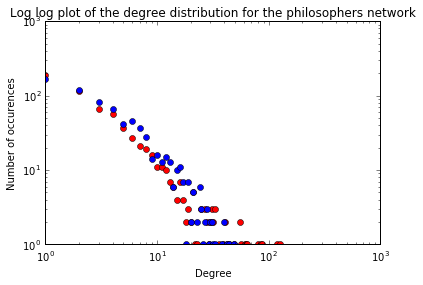

In [114]:
plt.loglog(degrees_in_bin[:-1], degrees_in_hist, 'ro')
plt.loglog(degrees_out_bin[:-1], degrees_out_hist, 'o')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Log log plot of the degree distribution for the philosophers network')
plt.show()